# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание
1. [Шаг 1. Файл с данными, изучение общей информации](#start)
2. [Шаг 2. Предобработка данных таблицы](#shag2)
3. [Шаг 3. Расчет и добавление столбцов в таблицу:](#shag3)
    * [цена квадратного метра](#shag3)
    * [день недели, месяц и год публикации объявления](#shag3)
    * [этаж квартиры; варианты — первый, последний, другой](#shag3)
    * [соотношение жилой и общей площади, а также отношение площади кухни к общей](#shag3)
4. [Шаг 4. Исследовательский анализ данных и выполнение инструкций](#shag4)
    * [4.1 Изучение параметров: площадь, цена, число комнат, высота потолков.](#shag4.1)
    * [4.2 Изучение времени продажи квартиры. Расчет средней и медианы. Выясняем, сколько обычно занимает продажа.](#shag4.2)
    * [4.3 Убираем редкие и выбивающиеся значения.](#shag4.3)
    * [4.4 Факторы влияющие на стоимость квартиры: Зависит ли цена от площади, числа комнат, удалённости от центра. Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Зависимость от даты размещения: дня недели, месяца и года.](#shag4.4)
    * [4.5 10 населённых пунктов с наибольшим числом объявлений. Расчет средней цены квадратного метра в этих населённых пунктах. Населённые пункты с самой высокой и низкой стоимостью жилья.](#shag4.5)
    * [4.6 Какая область входит в центр Санкт-Петербурга. Столбец в таблице с расстоянием до центра в километрах. Расчет средней цены для каждого километра. График показывающий, как цена зависит от удалённости от центра. Граница, где находится центральная зона.](#shag4.6)
    * [4.7 Сегмент квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Выводы и сравнение с общими выводами по всей выборке.](#shag4.7)
5. [Шаг 5. Общий вывод](#shag5)

## Шаг 1. Файл с данными, изучение общей информации
<a id="start"></a> 

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Вывод по общей информации:
В таблице 22 столбца и 23699 строк. В некоторых столбцах есть пропуски NaN, их нужно постараться обработать. Также нужно будет поменять типы данных столбцов.
#### Название столбцов:
    1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    2. balcony — число балконов
    3. ceiling_height — высота потолков (м)
    4. cityCenters_nearest — расстояние до центра города (м)
    5. days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    6. first_day_exposition — дата публикации
    7. floor — этаж
    8. floors_total — всего этажей в доме
    9. is_apartment — апартаменты (булев тип)
    10. kitchen_area — площадь кухни в квадратных метрах (м²)
    11. last_price — цена на момент снятия с публикации
    12. living_area — жилая площадь в квадратных метрах(м²)
    13. locality_name — название населённого пункта
    14. open_plan — свободная планировка (булев тип)
    15. parks_around3000 — число парков в радиусе 3 км
    16. parks_nearest — расстояние до ближайшего парка (м)
    17. ponds_around3000 — число водоёмов в радиусе 3 км
    18. ponds_nearest — расстояние до ближайшего водоёма (м)
    19. rooms — число комнат
    20. studio — квартира-студия (булев тип)
    21. total_area — площадь квартиры в квадратных метрах (м²)
    22. total_images — число фотографий квартиры в объявлении

## Шаг 2. Предобработка данных
<a id="shag2"></a>

#### 2.1 Меняем название столбца cityCenters_nearest на нижний регистр:

In [4]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
#меняем название столбца 'cityCenters_nearest' на нижний регистр:
df.set_axis(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'], axis='columns', inplace=True)

In [6]:
#проверяем:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### 2.2 Выясним в каких столбцах есть пропуски и сколько:

In [7]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Вывод по пропускам: 
После проверки на количество пропусков выявлено, что из 22 столбцов таблицы в 14 столбцах есть пропуски NaN. В таблице 23699 строк, и эти 14 столбцов имеют пропуски в строках в следующем количестве:
    - ceiling_height           9195
    - floors_total               86
    - living_area              1903
    - is_apartment            20924
    - kitchen_area             2278
    - balcony                 11519
    - locality_name              49
    - airports_nearest         5542
    - citycenters_nearest      5519
    - parks_around3000         5518
    - parks_nearest           15620
    - ponds_around3000         5518
    - ponds_nearest           14589
    - days_exposition          3181

#### 2.3 Обработка пропусков:

#### Пропуск №1. Столбец 'locality_name'. В этом столбце 49 пропусков. Нужно сообщить разработчикам. Сейчас заменяем эти пропуски названия населенного пункта на "unknown":

In [8]:
df[df['locality_name'].isnull()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [9]:
df['locality_name'] = df['locality_name'].fillna('unknown')

In [10]:
# проверяем:
df['locality_name'].isnull().sum()

0

#### Пропуск №2. Столбец 'airports_nearest'. В этом столбце 5542 пропусков. Нужно сообщить разработчикам. Сейчас заменяем эти пропуски на среднее расстояние по типу населенного пункта:

In [11]:
# Пропуск №2 airports_nearest
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('mean'))

#### Пропуск №3. Столбец 'citycenters_nearest'. В этом столбце 5519 пропусков. Нужно сообщить разработчикам. Сейчас заменяем эти пропуски на среднее расстояние по типу населенного пункта:

In [12]:
# Пропуск №3 citycenters_nearest
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(df.groupby('locality_name')['citycenters_nearest'].transform('mean'))

In [13]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name               0
airports_nearest         5386
citycenters_nearest      5386
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
df[df['airports_nearest'].isnull()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [15]:
df[df['citycenters_nearest'].isnull()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


#### в столбцах airports_nearest и citycenters_nearest осталось одинаковое количество пропусков, заменяем их на 0:

In [16]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

In [17]:
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(0)

#### Пропуск №4. Столбец 'balcony'. В этом столбце 11519 пропусков. Нужно сообщить разработчикам. Возможно данные пропуски возникли, так как жилье не имеет балкона и поэтому пользователь не заполнил. Сейчас заменяем эти пропуски на нулевые значения:

In [18]:
#4 в столбце balcony пропуски заменяем на 0:
df['balcony'] = df['balcony'].fillna(0)

#### Пропуск №5. Столбец 'is_apartment'. В этом столбце 20924 пропусков. Нужно сообщить разработчикам. Возможно данные пропуски возникли, так как не все пользователи имеют четкое понятие об этом виде жилья. В общем жилищном фонде на данный момент доля апартаментов не так много, поэтому сейчас заменяем эти пропуски на False:

In [19]:
#5 в столбце is_apartment пропуски заменяем на False:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Пропуски № 6, 7, 8, 9. Столбцы "parks_around3000, parks_nearest, ponds_around3000, ponds_nearest". В этих 4 столбцах 5518, 15620, 5518, 14589 пропусков соответственно. Нужно сообщить разработчикам. Возможно данные пропуски возникли, так как жилье действительно не имеют рядом парков и прудов, поэтому пользователь не заполнил. Сейчас заменяем эти пропуски на нулевые значения:

In [20]:
#6 в столбце parks_around3000 пропуски заменяем на 0:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [21]:
#7 в столбце parks_nearest пропуски заменяем на 0:
df['parks_nearest'] = df['parks_nearest'].fillna(0)

In [22]:
#8 в столбце ponds_around3000 пропуски заменяем на 0:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [23]:
#9 в столбце ponds_nearest пропуски заменяем на 0:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)

#### Пропуски № 10. Столбец "days_exposition". В этом столбце 3181 пропусков. Нужно сообщить разработчикам. Возможно данные пропуски возникли, так как жилье действительно было продано, но пользователь забыл снять объявление. Сейчас заменяем эти пропуски на нулевые значения:

In [24]:
#10 в столбце days_exposition пропуски заменяем на 0:
df['days_exposition'] = df['days_exposition'].fillna(0)

#### Пропуски № 11,12,13,14. Столбцы "ceiling_height, floors_total, living_area, kitchen_area". В этих 4 столбцах 9195, 86, 1903, 2278 пропусков соответственно. Нужно сообщить разработчикам. Отсутствие значения — тоже важный сигнал, который не нужно прятать. Сейчас эти пропуски оставляем как есть.

#### Итого проверяем наличие пропусков после их обработки:

In [25]:
df.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name              0
airports_nearest           0
citycenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

#### 2.4 Изменение типа данных в столбцах:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
citycenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

#### Следующие столбцы переводим в тип данных "int" целое число для удобства их обработки, наглядности:

In [27]:
#приведим данные к нужным типам:
df['last_price'] = df['last_price'].astype('int')

In [28]:
df['floors_total'] = df['balcony'].astype('int')
df['balcony'] = df['balcony'].astype('int')

In [29]:
df['airports_nearest'] = df['airports_nearest'].astype('int')
df['citycenters_nearest'] = df['citycenters_nearest'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['parks_nearest'] = df['parks_nearest'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

#### Столбец "first_day_exposition" переводим соответственно в тип данных "datetime":

In [30]:
#переведем столбец first_day_exposition в тип данных дата:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Проверяем после обработки:

In [31]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0
1,7,3350000,40.4,2018-12-04,1,NaN,2,18.6,1,False,...,11.0,2,посёлок Шушары,12817,18603,0,0,0,0,81
2,10,5196000,56.0,2015-08-20,2,NaN,0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.0,2015-07-24,3,NaN,0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.0,2018-06-19,2,3.03,0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
citycenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000     

#### 2.5 Проверяем наличие дубликатов:

In [33]:
df.duplicated().sum()

0

## Шаг 3. Посчитаем и добавляем в таблицу:
<a id="shag3"></a>
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [34]:
#посчитаем и создаем в таблице столбец цена за квадратный метр:
df['price_square_meter'] = df['last_price'] / df['total_area']

In [35]:
#поменяем сразу тип данных на int:
df['price_square_meter'] = df['price_square_meter'].astype('int')

In [36]:
#создаем столбец дня недели в таблице:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

In [37]:
#создаем столбец месяца в таблице:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [38]:
#создаем столбец года в таблице:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [39]:
#создаем столбец этаж квартиры (варианты — первый, последний, другой):
def level_floor(row):
     if row['floor'] == 1:
         return 'первый'
     elif row['floor'] == row['floors_total']:
         return 'последний'
     else:
         return 'другой'
    
#категоризуем этажи с помощью функции  
df['level_floor'] = df.apply(level_floor, axis = 1)

In [40]:
#добавим столбец соотношения жилой площади к общей площади:
df['living_part_area'] = df['living_area'] / df['total_area']

In [41]:
#добавим столбец соотношения площади кухни к общей площади:
df['kitchen_part_area'] = df['kitchen_area'] / df['total_area']

In [42]:
#проверяем, выведем первые пять строк таблицы:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,level_floor,living_part_area,kitchen_part_area
0,20,13000000,108.0,2019-03-07,3,2.70,0,51.0,8,False,...,2,755,0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,2,18.6,1,False,...,0,0,81,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,0,34.3,4,False,...,2,574,558,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,0,NaN,9,False,...,3,234,424,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,0,32.0,13,False,...,1,48,121,100000,1,6,2018,другой,0.320000,0.410000


## Шаг 4. Исследовательский анализ данных и выполнение инструкций
<a id="shag4"></a>

### 4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Создаем гистограммы для каждого параметра.
<a id="shag4.1"></a>

Text(0, 0.5, 'Кол-во объявлений')

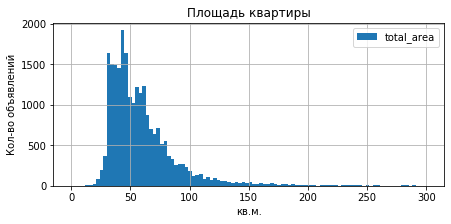

In [43]:
#создаем гистрограмму общей площади жилья:

total_area = df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (7,3), range = (0,300), title='Площадь квартиры')
total_area.set_xlabel('кв.м.')
total_area.set_ylabel('Кол-во объявлений')

In [44]:
#цену жилья указываем сокращаем в млн.:

df['last_price'] = df['last_price']/1000000

Text(0, 0.5, 'кол-во объявлений')

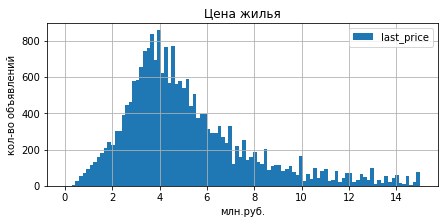

In [45]:
#создаем гистрограмму цены жилья:

price_flat = df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (7,3), range = (0,15), title='Цена жилья')
price_flat.set_xlabel('млн.руб.')
price_flat.set_ylabel('кол-во объявлений')

Text(0, 0.5, 'кол-во объявлений')

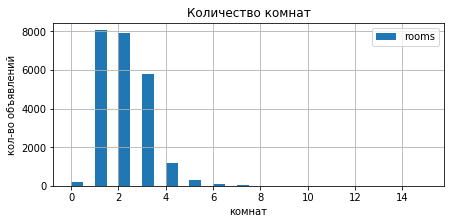

In [46]:
#создаем гистрограмму количества комнат:

rooms_hist = df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (7,3), range = (0,15), title='Количество комнат')
rooms_hist.set_xlabel('комнат')
rooms_hist.set_ylabel('кол-во объявлений')

Text(0, 0.5, 'кол-во объявлений')

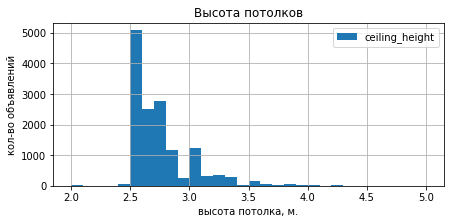

In [47]:
#создаем гистрограмму высоты потолка:

ceiling_hist = df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (7,3), title='Высота потолков')
ceiling_hist.set_xlabel('высота потолка, м.')
ceiling_hist.set_ylabel('кол-во объявлений')

In [48]:
#список характерных значений площади, цены, комнат, высоты потолков:

df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,14504.000000
mean,60.348651,6.541549,2.070636,2.771499
std,35.654083,10.887013,1.078405,1.261056
min,12.000000,0.012190,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.520000
50%,52.000000,4.650000,2.000000,2.650000
75%,69.900000,6.800000,3.000000,2.800000
max,900.000000,763.000000,19.000000,100.000000


#### Вывод по параметрам жилья:
- Средняя площадь продаваемого жилья составляет 60,3 кв.м. медиана составила 52 кв.м. Минимальная площадь составила 12 кв.метров, максимальная 900 кв.м. По гистограмме видно, что большая часть продаваемого жилья варьируется от 30 до 70 кв.м.
- Цена продажи в среднем составляет 6,5 млн.рублей, медиана 4,65 млн.рублей. Минимальная цена была всего 12190 рублей, максимальная цена составила 763 млн.рублей. По гистограмме в основном цены распределяются от 2,5 до 6 млн. рублей.
- Среднее количество комнат составила 2, медиана также 2. Максимальное количество комнат было 19 комнат. Основная масса продаваемых квартир это 1-комнатные, 2-комнатные и 3-комнатные квартиры.
- Высота потолка в среднем составляет 2,77 м., медиана 2,65 м. Минимальная составила 1м., максимальная 100 м. Распределение основной массы жилья по высоте потолка от 2,5 м. до 2,8 м.

### 4.2. Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Выясним когда можно считать, что продажи прошли очень быстро, а когда долго.
<a id="shag4.2"></a>

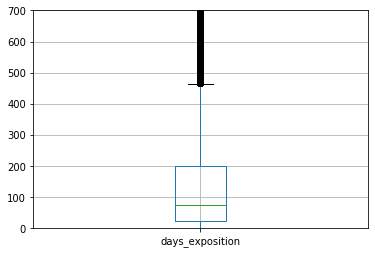

In [49]:
#построим диаграмму размаха дней размещения объявления

import matplotlib.pyplot as plt
plt.ylim(0, 700)
df.boxplot(['days_exposition'])

In [50]:
df['days_exposition'].describe()

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'кол-во объявлений')

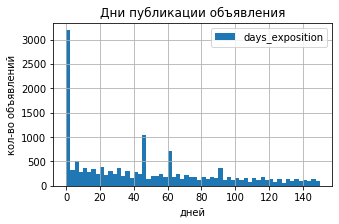

In [51]:
days_expo = df.plot(y = 'days_exposition', kind = 'hist', bins = 60, range = (0,150), grid=True, figsize = (5,3), title = ('Дни публикации объявления'))
days_expo.set_xlabel('дней')
days_expo.set_ylabel('кол-во объявлений')

In [52]:
df['days_exposition'].value_counts().head(15)

0     3181
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
9      143
20     139
8      139
44     138
11     135
Name: days_exposition, dtype: int64

#### Вывод по времени продажи жилья:
   Среднее время продажи составила 156 дней, медиана 74 дня. Минимальное время 0 дней, максимальное 1580 дней. По гистограмме обнаружены пики продаж по 0, 45, 60 и 90 дней. По диаграмме размаха первый квартиль находитя на 22 днях, третий квартиль на 199 днях, максимальный межквартильный размах примерно 460 дней. На данный момент можно считать, что 22 дня считается продажа прошла очень быстро, а превышение 199 дней продаж считается необычно долго.

### 4.3. Убираем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.
<a id="shag4.3"></a>

Для достоверности убераем выбивающиеся значения. Убераем 0 дней, так как меньше чем за 1 день очень редко можно продать, возможно эти объявления отменяют сами пользователи по различным причинам (передумали, решили подредактировать и т.д.). Убераем также 45,60 и 90 дней. Это контрольные дни на площадке объявлений, если пользователь не подтверждает актуальность объявления, то система снимает объявление. Также уберем согласно диаграмме размаха редкие значение - объявления превышающие 460 дней.

In [53]:
good_data = df.query('days_exposition != 0 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 and days_exposition < 460')

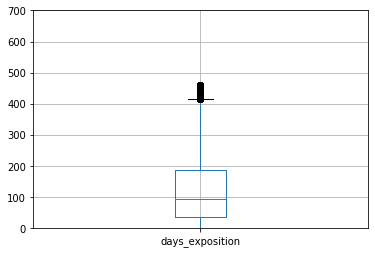

In [54]:
plt.ylim(0, 700)
good_data.boxplot(['days_exposition'])

In [55]:
good_data['days_exposition'].describe()

count    16841.000000
mean       127.639867
std        114.395030
min          1.000000
25%         35.000000
50%         92.000000
75%        187.000000
max        459.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'кол-во объявлений')

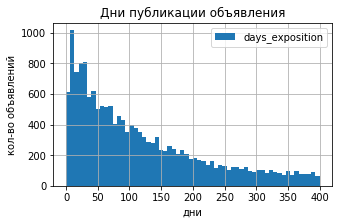

In [56]:
gd_hist = good_data.plot(y = 'days_exposition', kind = 'hist', bins = 60, range = (0,400), grid=True, figsize = (5,3), title=('Дни публикации объявления'))
gd_hist.set_xlabel('дни')
gd_hist.set_ylabel('кол-во объявлений')

#### Вывод после устранения редких и выбивающихся значений по времени продажи жилья:
   Теперь среднее время продажи составила уже 127 дней вместо 156 дней, медиана 92 дней вместо 74 дня. Минимальное время 1 день, максимальное 459 дней. По гистограмме видим, что пик частоты продаж составляет 20 дней и считается продажа прошла очень быстро, а превышение 187 дней продаж считается необычно долго.

### 4.4 Факторы влияющие на стоимость квартиры:
<a id="shag4.4"></a>
- Зависит ли цена от площади, числа комнат, удалённости от центра.
- Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
- Зависимость от даты размещения: дня недели, месяца и года.

#### 1. Площадь квартиры:

In [57]:
# создаем сводную таблицу по площади и цены:

piv_table_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_total_area.columns = ['count', 'mean', 'median']

Text(0, 0.5, 'цена, млн.руб.')

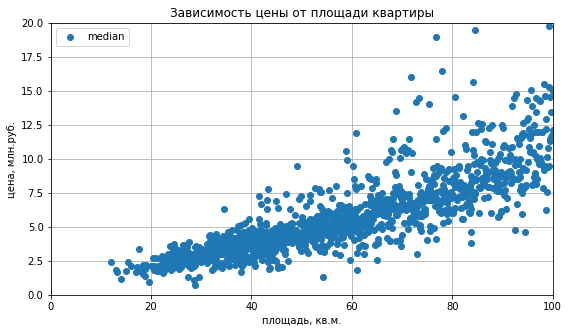

In [58]:
pt_total_area = piv_table_total_area.plot(y='median', xlim=(0,100), ylim= (0,20), style='o', grid=True, figsize=(9, 5), title = ('Зависимость цены от площади квартиры'))
pt_total_area.set_xlabel('площадь, кв.м.')
pt_total_area.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от площади жилья:
Согласно диаграмме чем больше площадь, тем выше становится цена. Есть прямая зависимость. Влияние площади квартиры на цену существенная.

#### 2. Количество комнат:

In [59]:
piv_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_rooms.columns = ['count', 'mean', 'median']

Text(0, 0.5, 'цена, млн.руб.')

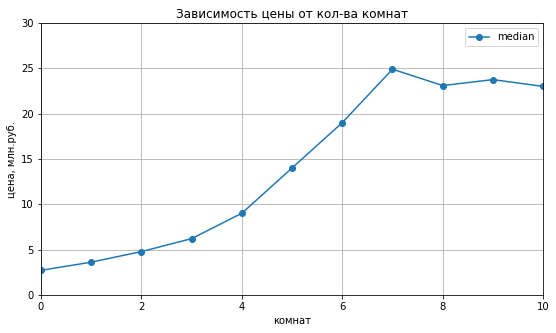

In [60]:
pt_rooms = piv_table_rooms.plot(y='median', style='o-', xlim=(0,10), ylim= (0, 30), grid=True, figsize=(9, 5), title = ('Зависимость цены от кол-ва комнат'))
pt_rooms.set_xlabel('комнат')
pt_rooms.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от количества комнат:
Согласно диаграмме чем больше комнат, тем выше становится цена. Есть прямая зависимость. Начиная от 0 до 7 комнат цена растет от 2,5 млн.руб. до 25 млн.руб. Влияние количества комнат на цену существенная.

#### 3. Удаленность от центра:

In [61]:
piv_table_citycenters = df.pivot_table(index = 'citycenters_nearest', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_citycenters.columns = ['count', 'mean', 'median']

Text(0, 0.5, 'цена, млн.руб.')

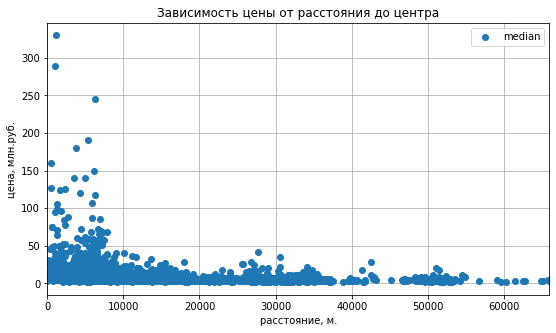

In [62]:
pt_center = piv_table_citycenters.plot(y='median', style='o', grid=True, figsize=(9, 5), title = ('Зависимость цены от расстояния до центра'))
pt_center.set_xlabel('расстояние, м.')
pt_center.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от удаленности от центра:
Согласно диаграмме чем меньше расстояние до центра, тем выше цены. В радиусе до 10 км. от центра цены максимально достигают свыше 300 млн.руб. Влияние удаленности от центра на цену квартиры существенная.

#### 4. Зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [63]:
piv_table_level = df.pivot_table(index = 'level_floor', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_level.columns = ['count', 'mean', 'median']

In [64]:
piv_table_level.sort_values('median', ascending = False)

,count,mean,median
level_floor,,,
другой,20396,6.793240,4.75
последний,386,6.376322,4.65
первый,2917,4.803560,3.90


Text(0, 0.5, 'цена, млн.руб.')

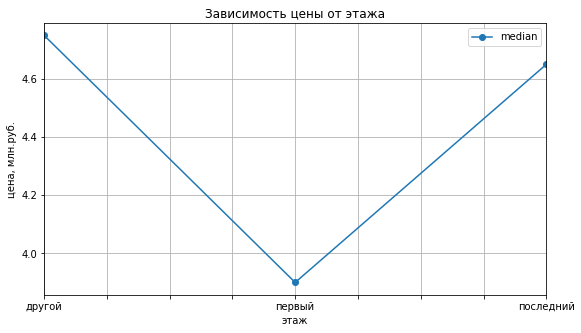

In [65]:
pt_level = piv_table_level.plot(y='median', style='o-', grid=True, figsize=(9, 5), title = ('Зависимость цены от этажа'))
pt_level.set_xlabel('этаж')
pt_level.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от уровня этажа:
Согласно графику самые низкие цены на квартиры находящиеся на первом этаже в районе 3,5 млн.руб. На последнем этаже квартиры дороже чем на первом, примерно на 32%. Квартиры находящиеся между первым и последним этажом самые дорогие, ориентировочная стоимость почти 4,8 млн.руб. Влияние уровня этажа на цену квартиры существенная.

#### 5. Зависимость цены от даты размещения: дня недели, месяца и года:


#### День недели:

In [66]:
piv_table_weekday = df.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_weekday.columns = ['count', 'mean', 'median']
piv_table_weekday['weekday_name'] = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

In [67]:
piv_table_weekday.sort_values('median', ascending = False)

,count,mean,median,weekday_name
weekday_exposition,,,,
1,4183,6.394233,4.730,Вторник
2,3974,6.627970,4.700,Среда
0,3612,6.511613,4.650,Понедельник
3,4295,6.708663,4.650,Четверг
4,4000,6.372131,4.585,Пятница
5,1936,6.976804,4.555,Суббота
6,1699,6.246180,4.550,Воскресенье


Text(0, 0.5, 'цена, млн.руб.')

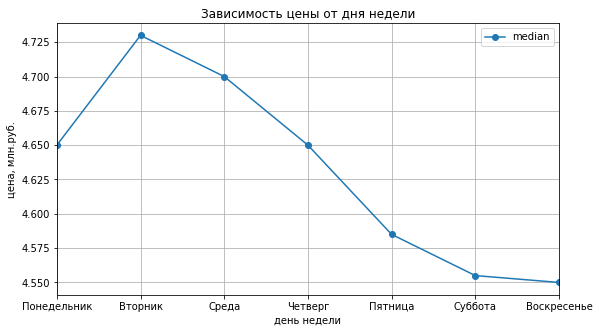

In [68]:
pt_weekday = piv_table_weekday.plot(x='weekday_name', y='median', style='o-', grid=True, figsize=(9, 5), title = ('Зависимость цены от дня недели'))
pt_weekday.set_xlabel('день недели')
pt_weekday.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от дня недели:
Согласно графику самые высокие цены на квартиры устанавливается в будний день во вторник, в районе 4,725 млн. руб. Самая низкая цена в воскресенье 4,550 млн.руб.

#### Месяц:

In [69]:
piv_table_month = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_month.columns = ['count', 'mean', 'median']
piv_table_month['month'] = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

Text(0, 0.5, 'цена, млн.руб.')

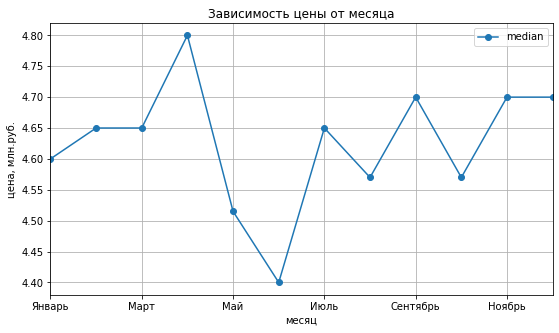

In [70]:
pt_month = piv_table_month.plot(x='month', y='median', style='o-', grid=True, figsize=(9, 5), title = ('Зависимость цены от месяца'))
pt_month.set_xlabel('месяц')
pt_month.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от месяца размещения:
Согласно графику самые высокие цены на квартиры устанавливаются в апреле, в районе 4,8 млн. руб. Самая низкая цена в июне 4,4 млн.руб.

#### Год:

In [71]:
piv_table_year = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_year.columns = ['count', 'mean', 'median']

Text(0, 0.5, 'цена, млн.руб.')

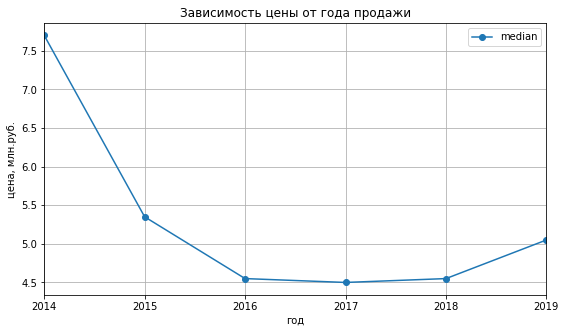

In [72]:
pt_year = piv_table_year.plot(y='median', style='o-', grid=True, figsize=(9, 5), title = ('Зависимость цены от года продажи'))
pt_year.set_xlabel('год')
pt_year.set_ylabel('цена, млн.руб.')

#### Вывод по зависимости цены от года размещения:
Согласно диаграмме самые высокие цены в среднем были в 2014 г., в районе 7,7 млн. руб. Самая низкая цена в 2017 году 4,5 млн.руб. Возможно это было связано с кризисом 2014 г., с резким ростом курса доллара по отношению к рублю. Начиная с 2017г. наблюдается тенденция повышения цен.

### 4.5. 10 населённых пунктов с наибольшим числом объявлений. Расчет средней цены квадратного метра в этих населённых пунктах. Населённые пункты с самой высокой и низкой стоимостью жилья.
<a id="shag4.5"></a>

In [73]:
piv_table_locality = df.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc = ['count', 'mean'])
piv_table_locality.columns = ['count', 'mean']

In [74]:
top10 = piv_table_locality.sort_values('count', ascending = False).head(10)
top10

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [75]:
max_price = top10.query('mean == mean.max()')
max_price

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231


In [76]:
min_price = top10.query('mean == mean.min()')
min_price

,count,mean
locality_name,,
Выборг,237,58141.489451


#### Вывод по списку топ10 населенных пунктов с наибольшим числом объявлений:
Список 10 населенных пунктов с наибольшим числом объявлений возглавляет г. Санкт-Петербург с количеством объявлений 15721, средняя цена за квадратный метро составила 114848,56 руб. На последнем десятом месте г. Выборг с количеством объявлений 237, средняя цена за квадратный метро составила 58141,48 руб. Самая высокая стоимость жилья в г. Санкт-Петербург, самая минимальная стоимость жилья в г. Выборг.

### 4.6. Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: показывающий, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.
<a id="shag4.6"></a>

In [77]:
# добавляем столбец расстояние до центра в километрах:

df['center_km'] = df['citycenters_nearest']/1000
df['center_km'] = df['center_km'].astype('int')

In [78]:
table_km_mean = (
    df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index = 'center_km', values = 'last_price', aggfunc = 'mean')
)

Text(0, 0.5, 'цена, млн.руб.')

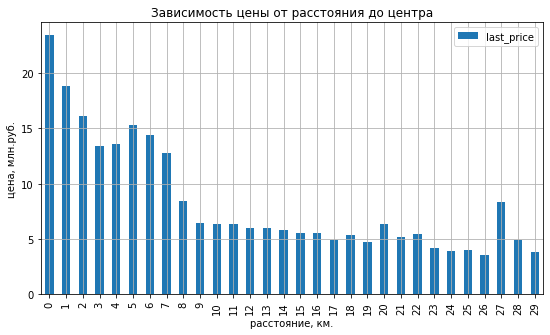

In [79]:
spbcenter_km = table_km_mean.plot(kind='bar', figsize=(9, 5), grid=True, title = ('Зависимость цены от расстояния до центра'))
spbcenter_km.set_xlabel('расстояние, км.')
spbcenter_km.set_ylabel('цена, млн.руб.')

#### Вывод по определению центральной зоны в г. Санкт-Петербург:
Согласно графику самое дорогостоящее жилье находится до 7 км. включительно от центра г. Санкт-Петербург, в среднем стоимость жилья там начинается 12,5 млн.руб. до 22 млн. руб. и выше.

### 4.7. Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Сравним с общими выводами по всем данным.
<a id="shag4.7"></a>

#### 1. Анализ цен на квартиры в центре по площади, цене, числу комнат, высоте потолков.

In [80]:
center_spb = df.query('center_km <= 7 and locality_name == "Санкт-Петербург"')

In [81]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,23699.000000,23699.000000,14504.000000
mean,60.348651,6.541549,2.070636,2.771499
std,35.654083,10.887013,1.078405,1.261056
min,12.000000,0.012190,0.000000,1.000000
25%,40.000000,3.400000,1.000000,2.520000
50%,52.000000,4.650000,2.000000,2.650000
75%,69.900000,6.800000,3.000000,2.800000
max,900.000000,763.000000,19.000000,100.000000


In [82]:
center_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3712.000000,3712.000000,3712.000000,2408.000000
mean,92.328303,14.729618,2.813308,3.102546
std,60.531664,24.704514,1.456235,0.854724
min,12.000000,1.600000,0.000000,2.000000
25%,56.000000,6.590000,2.000000,2.800000
50%,77.760000,9.000000,3.000000,3.000000
75%,108.725000,14.131375,3.000000,3.280000
max,900.000000,763.000000,19.000000,32.000000


#### Вывод по цене на квартиры в центре по площади, цене, числу комнат, высоте потолков:
- Средний размер площади жилья продаваемый в центральной зоне г. Санкт-Петербург составила 92,3 кв.м., в общей выборке средий размер площади составил 60,3 кв.м.
- Цена продажи квартир по медиане в центре Санкт-Петербурга составила 9 млн.руб., в общей выборке 4,65 млн.руб.
- Квартиры по количеству комнат по медиане в центре Санкт-Петербурга продаются в основном 3-комнатные, в общей выборке 2-комнатные.
- Средняя высота потолков продаваемого жилья в центре составила 3,10 метра, в общей выборке 2,77 метров.

#### 2. Анализ цен на квартиры в центре по этажу:

In [83]:
center_spb_level = center_spb.pivot_table(index = 'level_floor', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
center_spb_level.columns = ['count', 'mean', 'median']

In [84]:
center_spb_level.sort_values('median', ascending = True)

,count,mean,median
level_floor,,,
первый,407,9.167233,6.550
другой,3273,15.411198,9.500
последний,32,15.763309,12.325


Text(0, 0.5, 'цена, млн.руб.')

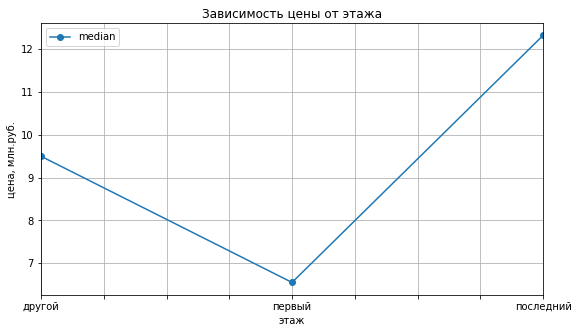

In [85]:
spbcenter_level = center_spb_level.plot(y='median', style='o-', grid=True, figsize=(9, 5), title = ('Зависимость цены от этажа'))
spbcenter_level.set_xlabel('этаж')
spbcenter_level.set_ylabel('цена, млн.руб.')

#### Вывод по цене на квартиры в центре по этажу:
Также как и в общей выборке согласно графику самые низкие цены на квартиры в центре Санкт-Петербурга находящиеся на первом этаже, стоимость в районе 6,5 млн.руб. Но в отличие от общей выборки квартиры на последнем этаже самые дорогие, медианные цены от 12 млн. Квартиры находящиеся между первым и последним этажом, ориентировочная стоимость по медиане свыше 9 млн.руб. Влияние уровня этажа на цену квартиры также существенная.

#### 3. Анализ цен на квартиры по удаленности от центра:

In [86]:
center_spb_citycenters = center_spb.pivot_table(index = 'citycenters_nearest', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
piv_table_citycenters.columns = ['count', 'mean', 'median']

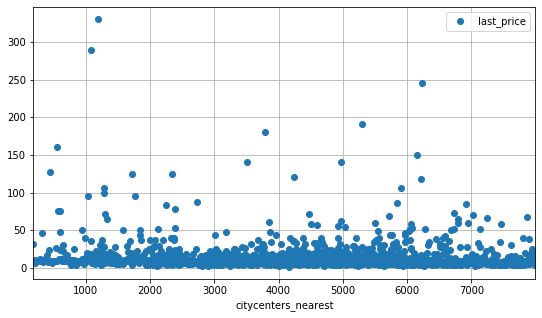

In [87]:
center_spb_citycenters.plot(y='median', style='o', grid=True, figsize=(9, 5))

#### Вывод по цене на квартиры по удаленности от центра:
Согласно графику влияние удаленности от центра на цены на квартиры в центральной зоне Санкт-Петербурга не существенно. Самые дорогие цены на квартиры находятся на расстояние 1 км., по цене в районе 300 млн.руб.

#### 4. Анализ цен на квартиры в центре по дню размещения объявления:

In [88]:
center_spb_weekday = center_spb.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
center_spb_weekday.columns = ['count', 'mean', 'median']

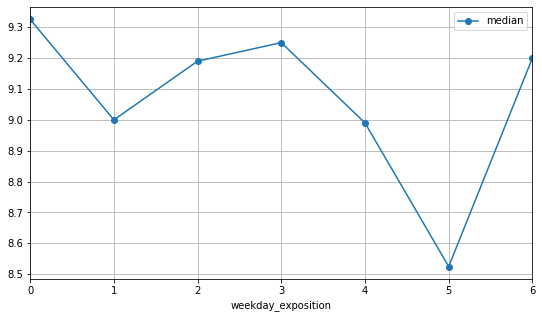

In [89]:
center_spb_weekday.plot(y='median', style='o-', grid=True, figsize=(9, 5))

#### Вывод по цене на квартиры по дню размещения объявления:
В отличие от общей выборки согласно графику самые высокие цены на квартиры устанавливается в будний день в понедельник, в районе 9,3 млн. руб. Самая низкая цена в субботу 8,5 млн.руб.

#### 5. Анализ цен на квартиры в центре по месяцу размещения объявления:

In [90]:
center_spb_month = center_spb.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
center_spb_month.columns = ['count', 'mean', 'median']

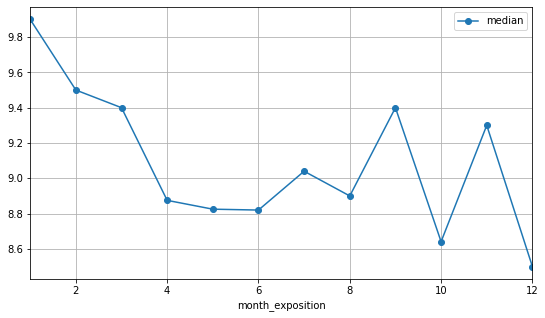

In [91]:
center_spb_month.plot(y='median', style='o-', grid=True, figsize=(9, 5))

#### Вывод по цене на квартиры по месяцу размещения объявления:
В отличие от общей выборки согласно графику самые высокие цены на квартиры устанавливаются в январе, свыше 9,8 млн. руб. Самая низкая цена в декабре ниже 8,6 млн.руб.

#### 6. Анализ цен на квартиры в центре по году размещения объявления:

In [92]:
center_spb_year = center_spb.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['count', 'mean', 'median'])
center_spb_year.columns = ['count', 'mean', 'median']

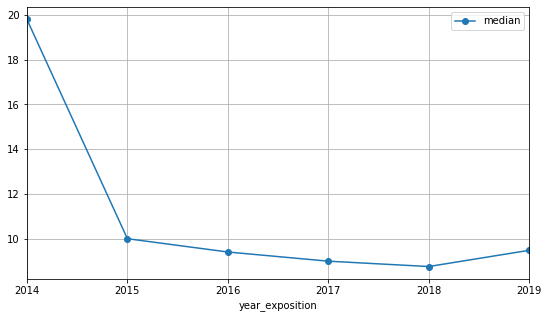

In [93]:
center_spb_year.plot(y='median', style='o-', grid=True, figsize=(9, 5))

#### Вывод по цене на квартиры по году размещения объявления:
Согласно графику самые высокие цены на квартиры были также в 2014 г., около 20 млн. руб. Самая низкая цена зафиксирована в 2018г., ниже 9 млн.руб.

#### 7. Анализ цен на квартиры в центре с общей выборкой по коэффициенту корреляции Пирсона:

In [94]:
# общая выборка:

df.corr()[['last_price']].sort_values(by='last_price', ascending=False)

,last_price
last_price,1.000000
price_square_meter,0.736499
total_area,0.653675
living_area,0.566492
kitchen_area,0.519869
rooms,0.363343
ponds_around3000,0.208621
parks_around3000,0.197840
parks_nearest,0.116925
airports_nearest,0.110956


In [95]:
# сегмент центральной зоны Санкт-Петербурга:

center_spb.corr()[['last_price']].sort_values(by='last_price', ascending=False)

,last_price
last_price,1.000000
price_square_meter,0.779992
total_area,0.636407
living_area,0.539359
kitchen_area,0.508284
rooms,0.333342
total_images,0.131486
floor,0.125747
parks_around3000,0.108583
ponds_around3000,0.104545


#### Вывод по цене на квартиры с общей выборкой по коэффициенту корреляции Пирсона::
Из данных выше, видно, что цены на квартиры в центре Санкт-Петербурга и также в общей выборке имеют прямую, положительную зависимость от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат. Обратная, отрицательная зависимость от удаленности от центра - чем дальше от центра, тем ниже цена.

## Шаг 5. Общий вывод
<a id="shag5"></a>

Проведена работа по исследованию данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет с 2014 г. по 2019 г.


Определили и изучили пропущенные значения. Заполнили пропуски, где это уместно. Для других типов данных не было подходящего значения на замену. В этом случае оставили эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать. В некоторых столбцах изменили тип данных.


Посчитали и добавили в таблицу:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.


Провели исследовательский анализ данных и выполнили:
- Изучили следующие параметры: площадь, цена, число комнат, высота потолков.
- Изучили время продажи квартиры. Посчитали среднее и медиану. Выяснили, сколько обычно занимает продажа.
- Убрали редкие и выбивающиеся значения.
- Изучили, зависит ли цена от площади, числа комнат, удалённости от центра. Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также выяснили зависимость от даты размещения: дня недели, месяца и года.
- Выбрали 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья.
- Выделили квартиры в Санкт-Петербурге. Выясняли, какая область входит в центр. Создали столбец с расстоянием до центра в километрах. После этого посчитали среднюю цену для каждого километра. Построили график: показывающий, как цена зависит от удалённости от центра. Определили границу, где находится центральная зона.
- Выделили сегмент квартир в центре. Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. Также выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделали выводы и сравнили с общими выводами по всей выборке.

Главные выводы, основные параметры для определения рыночной стоимости объектов жилой недвижимости:
- Цена за квадратный метр. Чем больше цена за квадратный метр, тем выше цена.
- Площадь квартиры. Чем больше площадь квартиры, тем выше цена.
- Доля жилой площади и кухни. Чем выше доля жилой площади и площадь кухни, тем выше цена.
- Количество комнат. Чем больше комнат, тем выше цена.
- Этаж. На первом этаже квартира дешевле, чем на остальных. На последнем дороже, чем на первом, но дешевле чем на других.
- Расстояние до центра. Чем ближе к центру, тем дороже квартира. В самом центре (в районе 1 км до центра) квартиры стоят значительно дороже, чем на более удаленных.

Дополнительно выяснили:
- Квартиры, размещенные к продаже в будние дни, в среднем дороже, чем размещенные в выходные.
- Квартиры, размещенные к продаже в летние месяцы, в среднем дешевле, чем размещенные в любые другие месяца.
- Квартиры, размещенные к продаже в 2014 году, дороже всех. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - восстановление экономики - рост цен впервые после наступления кризиса.
